In [1]:
#Importing the library
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns

# Answer to Question 1:

In [19]:
synthTrainingData = pd.read_csv("synth.tr.csv",header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])
synthTestData = pd.read_csv("synth.te.csv",header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [20]:
synthTrainingData.head()

,xs,ys,yc
1,-0.970990,0.429425,0
2,-0.631997,0.251953,0
3,-0.773606,0.690751,0
4,-0.606212,0.175678,0
5,-0.539409,0.376744,0


In [22]:
synthTestData.head()

,xs,ys,yc
1,0.051008,0.160862,0
2,-0.748074,0.089040,0
3,-0.772934,0.263172,0
4,0.218374,0.127061,0
5,0.372683,0.496562,0


# Answer to Question 2:

The key objective of the case study is to understand how the classification works. It's a typical 2 class 2 feature problem.
Both the train and test dataset have two features : X and Y with 2 classes : 1 and 0 for yc (response variable)
We plan to construct a decision rule or run any of the classification algorithms to classify the sample points in the testing data to the respective categories

# Answer to Question 3:

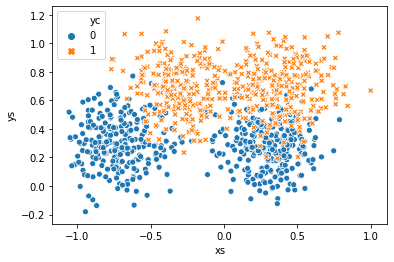

In [4]:
sns.scatterplot(x="xs", y="ys", hue="yc",style="yc",data=synthTrainingData,legend="full")

# Clearly 2 features are shown in the plot (X and Y) with 2 classes : 1 and 0 for yc variable [target / response]

# Answer to Question 4 :

In [24]:
duplicateCheck_xs = synthTrainingData[synthTrainingData.duplicated('xs')]
duplicateCheck_ys = synthTrainingData[synthTrainingData.duplicated('ys')]

# Answer to Question 5:

In [25]:
duplicateCheck['xs'].count()
duplicateCheck['ys'].count()

# Both xs and ys features in the given training dataset has no duplicates

0

# Answer to Question 6:

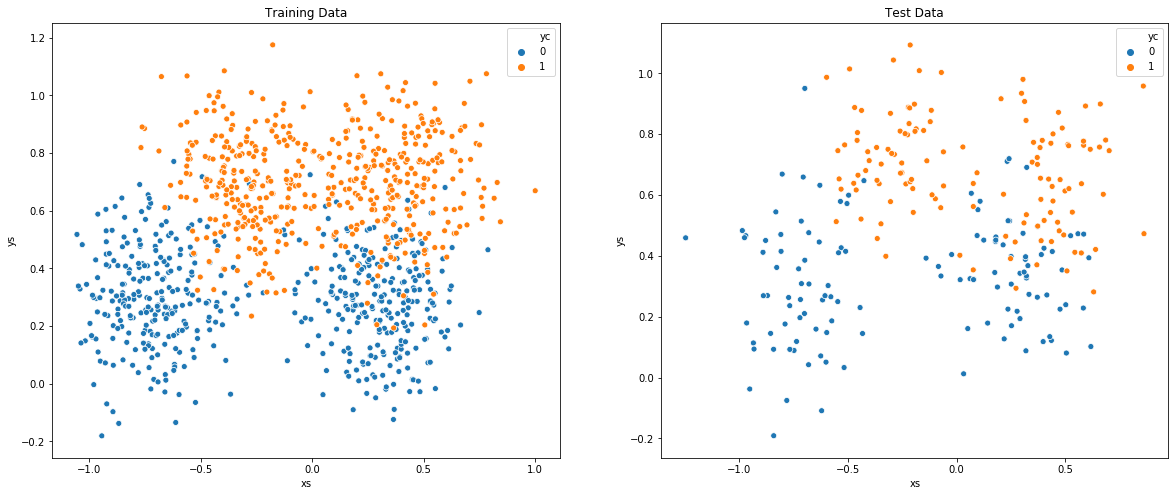

In [26]:
f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.scatterplot(x="xs", y="ys", hue="yc",ax=ax1,data=synthTrainingData,legend="full");
sns.scatterplot(x="xs", y="ys", hue="yc",ax=ax2,data=synthTestData,legend="full");
ax2.set_title("Test Data");
ax1.set_title("Training Data");

# Answer to Question 7:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FA6902E88>,
      dtype=object)

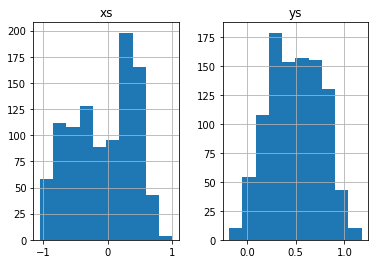

In [27]:
synthTrainingData[["xs","ys"]].hist()

# Answer to Question 8:

Supervised machine learning: because we have labeled data here in the given dataset. 
Here: the features (X and Y) are the lables : independent variables : xs and ys for the response/target variable : yc
We can plan to construct a decision rule bsaed on which we can classify the sample points for the respective categories

# Answer to Question 9:

In [9]:
X = synthTrainingData[["xs","ys"]].values
y = synthTrainingData[["yc"]].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Answer to Question 10:

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\VISHAL\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1], d

# Answer to Question 11:

In [14]:
from sklearn import metrics

In [15]:
print(metrics.accuracy_score(y_test, y_pred))

0.8866666666666667


# Answer to Question 12:

In [34]:
from sklearn.metrics import confusion_matrix
cMatrix = confusion_matrix(y_test, y_pred)
cMatrix

array([[125,  19],
       [ 15, 141]], dtype=int64)

# Answer to Question 13:
Interpretation of the confusion matrix

In [36]:
print("Observations which were falsely classified as yc(1) =  %.1f Percent" %(cMatrix[0][1]/ sum(sum(cMatrix))*100 ) )
print("Observations which were falsely classified as yc(0) = %.1f Percent"%(cMatrix[1][0]/ sum(sum(cMatrix))*100 ) )
print("Observations which were truly classified as yc(1) = %.1f Percent"% (cMatrix[1][1]/ sum(sum(cMatrix))*100 ) )
print("Observations which were truly classified as yc(0) = %.1f Percent"% (cMatrix[0][0]/ sum(sum(cMatrix))*100 ))

Observations which were falsely classified as yc(1) =  6.3 Percent
Observations which were falsely classified as yc(0) = 5.0 Percent
Observations which were truly classified as yc(1) = 47.0 Percent
Observations which were truly classified as yc(0) = 41.7 Percent


# Answers to Question 14 and 15 :

In [42]:
# precision, recall and F1
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
## Classification Algorithms

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

import pandas as pd
import numpy as np

# importing ploting libraries
import matplotlib.pyplot as plt   
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns


# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

# Library for Normalization of Numerical Data
from scipy.stats import zscore

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(y_train)])

models = []

models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('RF', RandomForestClassifier()))

# Model Evaluation

result = []
model_names = []
scoring = ['accuracy', 'recall', 'precision', 'roc_auc']

for model_name, model in models:
    kfold = KFold(n_splits=10, random_state=666)
    cv_results1 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[0])
    cv_results2 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[1])
    cv_results3 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[2])
    cv_results4 = cross_val_score(model, X_train, y_train, cv = kfold, scoring=scoring[3])
    model_names.append(model_name)
    msg = "%s:\n ACCURACY = %f, RECALL=(%f), PRECISION=(%f), ROC-AUC=(%f)" % (model_name, cv_results1.mean(),cv_results2.mean(), cv_results3.mean(), cv_results4.mean())
    print(msg)

LR:
 ACCURACY = 0.890000, RECALL=(0.894828), PRECISION=(0.883629), ROC-AUC=(0.961580)
SVC:
 ACCURACY = 0.918571, RECALL=(0.911045), PRECISION=(0.919932), ROC-AUC=(0.969484)
RF:
 ACCURACY = 0.902857, RECALL=(0.895455), PRECISION=(0.898728), ROC-AUC=(0.966967)


# Answer to Question 16:

SVC (Support Vector Classifier ) is the best performing model out of the 3 with 92% accuracy and ROC-AUC of 0.969 followed by  Random Forest and Logistic Regression.